In [1]:
from astropy.table import Table

In [2]:
import numpy as np
import pandas as pd

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/software/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [21]:
snia = Table.read('LSST_Ia_HEAD.FITS').to_pandas()

In [22]:
sncc = Table.read('LSST_NONIa_HEAD.FITS').to_pandas()

In [43]:
df = pd.concat([snia, sncc], axis=0)
df.SNID = df.SNID.astype(int)

In [44]:
df.columns

Index([u'DECL', u'FAKE', u'HOSTGAL_LOGMASS', u'HOSTGAL_LOGMASS_ERR',
       u'HOSTGAL_MAG_Y', u'HOSTGAL_MAG_g', u'HOSTGAL_MAG_i', u'HOSTGAL_MAG_r',
       u'HOSTGAL_MAG_u', u'HOSTGAL_MAG_z', u'HOSTGAL_OBJID', u'HOSTGAL_PHOTOZ',
       u'HOSTGAL_PHOTOZ_ERR', u'HOSTGAL_SB_FLUXCAL_Y', u'HOSTGAL_SB_FLUXCAL_g',
       u'HOSTGAL_SB_FLUXCAL_i', u'HOSTGAL_SB_FLUXCAL_r',
       u'HOSTGAL_SB_FLUXCAL_u', u'HOSTGAL_SB_FLUXCAL_z', u'HOSTGAL_SNSEP',
       u'HOSTGAL_SPECZ', u'HOSTGAL_SPECZ_ERR', u'IAUC', u'MWEBV', u'MWEBV_ERR',
       u'NOBS', u'NXPIX', u'NYPIX', u'PEAKMJD', u'PIXSIZE', u'PTROBS_MAX',
       u'PTROBS_MIN', u'RA', u'REDSHIFT_FINAL', u'REDSHIFT_FINAL_ERR',
       u'REDSHIFT_HELIO', u'REDSHIFT_HELIO_ERR', u'SEARCH_TYPE', u'SIM_AV',
       u'SIM_AVTAU', u'SIM_DECL', u'SIM_DLMU', u'SIM_EXPOSURE_Y',
       u'SIM_EXPOSURE_g', u'SIM_EXPOSURE_i', u'SIM_EXPOSURE_r',
       u'SIM_EXPOSURE_u', u'SIM_EXPOSURE_z', u'SIM_GALFRAC_Y',
       u'SIM_GALFRAC_g', u'SIM_GALFRAC_i', u'SIM_GALFRAC_r', u'SI

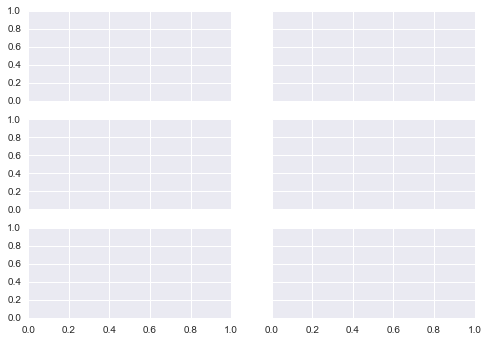

In [45]:
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True);

In [46]:
_ = df.hist('NOBS', by='SNTYPE', histtype='step', bins=np.arange(0, 1500, 5), lw=2., alpha=1,
            ax=ax, sharex=True, sharey=True)

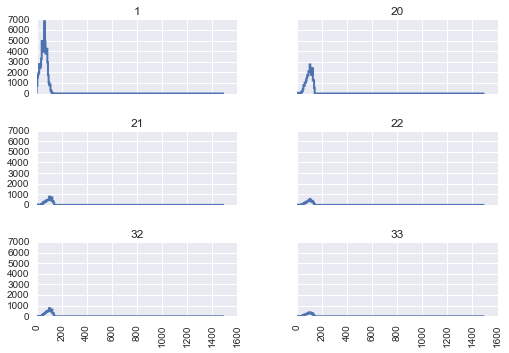

In [47]:
fig

In [48]:
assert len(df) == len(snia) + len(sncc)

In [49]:
_data = np.loadtxt('test_predictions.txt')

In [52]:
predictions = pd.DataFrame(_data, columns=('SNID', 'prob', 'SNcc', 'SNIa'))
predictions = predictions.apply(pd.to_numeric)
predictions.SNID = predictions.SNID.astype(int)

In [53]:
predictions.head()

,SNID,prob,SNcc,SNIa
0,13,0.999514,0.0,0.0
1,42,0.999891,0.0,0.0
2,89,0.994168,0.0,0.0
3,115,0.999229,0.0,0.0
4,187,0.999974,0.0,0.0


In [54]:
len(predictions)

299900

In [55]:
joined = pd.merge(df, predictions, on='SNID', how='inner')

In [57]:
results = joined[['SNID', 'SNTYPE',  'prob', 'SNIa', "SNcc"]]
results.SNTYPE = results.SNTYPE.astype('int')
results.prob = results.prob.astype(np.float)

/usr/local/software/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [58]:
import seaborn as sns
sns.set()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d847a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1109e6a10>]], dtype=object)

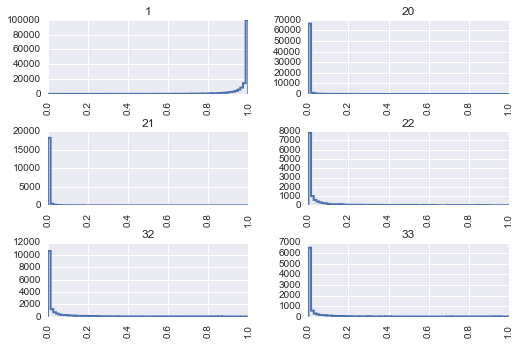

In [60]:
results.hist('prob', by='SNTYPE', histtype='step', lw=2, bins=75)